In [1]:

import torch.nn as nn
import torchvision
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim

C:\Users\Will_\miniconda3\envs\csc413\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## **Step1 Load the data**

In [474]:
import dataloader
creature_imgs, creature_captions =dataloader.get_torch_creature_data() 

## **Step2 Process the data**
Turn both the image and captions in to embeddings,\
For images we are using **VGG16** to obtain the features
For captions we are using **GloVe** embeddings

* GloVe embedding

In [3]:
# creature_tokens = [i.replace(".", " . ").replace(",", " , ").replace(";", " ; ").replace("?", " ? ").lower().split() for i in creature_captions]


        Load glove embedding

In [4]:
# glove = torchtext.vocab.GloVe(name="6B", dim=50)

In [5]:
# for i in glove.stoi.keys():
#     if "<" in i:
#         print(i)

        Get the mean of all embedding vectors, we will use this mean as the embedding of all unseen words

In [6]:
# mean = glove.vectors.mean(dim=0)
# glove_vector_with_unk = torch.cat((glove.vectors,mean.unsqueeze(0)))

In [7]:
# vocab_size = len(glove_vector_with_unk)

        Get the vector representation of all sentences

In [8]:
## obtain the index of all words in the caption
# emb_creature_captions =[] 
# for caption in creature_tokens:
#     emb_creature_captions.append(torch.Tensor([glove.stoi[i] if i in glove.stoi.keys() else 400000 for i in caption]).int())

In [9]:
## pad the captions
# from torch.nn.utils.rnn import pad_sequence
# padded_emb_creature_captions = pad_sequence(emb_creature_captions,batch_first=True)


In [10]:
## obtain the embedding
# glove_emb = nn.Embedding.from_pretrained(glove_vector_with_unk)
# target = glove_emb(padded_emb_creature_captions)


* Character by character Onehot embedding

In [11]:
# use { and } as start of the sentence and end of sentence
# use @ as padding
def get_character_vocab(sentences):
    return list(set([i for sentence in sentences for word in sentence.lower() for i in word] ))+ ["{", "}"] + ["@"]
    

In [12]:
vocab = get_character_vocab(creature_captions)

In [13]:
vocab_stoi = {vocab[i] :i for i in range(len(vocab))}
vocab_itos = {i:vocab[i] for i in range(len(vocab))}    

In [514]:
def make_torch_token(sentences, vocab):
    tokens = []
    for sentence in sentences:
        token = [vocab_stoi["{"]] + [vocab_stoi[character] for character in sentence.lower()] + [vocab_stoi["}"]]
        tokens.append(token)
    return np.array(tokens)

In [383]:
def make_onehot(tokens,vocab):
    
    word_onehot = torch.eye(len(vocab))
    onehot_sentences = []
    for token in tokens:
        torch_onehot_sentence = word_onehot[token.int().tolist()]
        onehot_sentences.append(torch_onehot_sentence.unsqueeze(0))
    
    return onehot_sentences

In [16]:
def get_sentence_from_onehot(sentences, vocab):
    readable_sentences = []
    for sentence in sentences:
        readable_sentence = [vocab[torch.argmax(character)] for character in sentence]
    
        readable_sentences.append(readable_sentence)
         
    return readable_sentences

In [515]:
token_creature_captions = make_torch_token(creature_captions,vocab)

C:\Users\Will_\AppData\Local\Temp\ipykernel_31900\3107438979.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(tokens)


In [525]:
small_token_creature_captions = token_creature_captions[:5]

In [526]:
small_token_creature_captions

array([list([48, 28, 44, 3, 34, 22, 30, 17, 44, 22, 42, 44, 28, 44, 0, 22, 42, 37, 44, 17, 23, 21, 16, 16, 44, 22, 16, 44, 3, 30, 22, 46, 24, 22, 42, 26, 44, 14, 0, 44, 28, 44, 16, 21, 29, 44, 18, 25, 44, 16, 29, 28, 22, 23, 16, 44, 22, 42, 44, 28, 42, 44, 21, 42, 29, 23, 19, 44, 8, 28, 19, 44, 49]),
       list([48, 28, 44, 24, 30, 28, 3, 37, 44, 17, 18, 26, 44, 28, 42, 17, 44, 28, 44, 16, 0, 18, 29, 29, 21, 17, 44, 17, 18, 26, 44, 28, 23, 21, 44, 25, 22, 26, 34, 29, 22, 42, 49]),
       list([48, 28, 44, 30, 22, 29, 29, 30, 21, 44, 26, 22, 23, 30, 44, 3, 18, 45, 21, 23, 21, 17, 44, 22, 42, 44, 0, 28, 22, 42, 29, 44, 16, 22, 29, 16, 44, 22, 42, 44, 25, 23, 18, 42, 29, 44, 18, 25, 44, 28, 44, 0, 28, 22, 42, 29, 21, 17, 44, 23, 28, 22, 42, 24, 18, 8, 44, 8, 22, 29, 34, 44, 34, 21, 23, 44, 34, 28, 42, 17, 16, 44, 22, 42, 44, 28, 44, 24, 18, 8, 30, 44, 49]),
       list([48, 28, 44, 46, 28, 42, 44, 30, 28, 19, 16, 44, 18, 42, 44, 28, 44, 24, 21, 42, 3, 34, 44, 8, 34, 22, 30, 21, 44, 34, 2

In [529]:
padded = pad_sequence([torch.Tensor(i) for i in small_token_creature_captions]).transpose(1,0)

In [530]:
padded

tensor([[48., 28., 44.,  3., 34., 22., 30., 17., 44., 22., 42., 44., 28., 44.,
          0., 22., 42., 37., 44., 17., 23., 21., 16., 16., 44., 22., 16., 44.,
          3., 30., 22., 46., 24., 22., 42., 26., 44., 14.,  0., 44., 28., 44.,
         16., 21., 29., 44., 18., 25., 44., 16., 29., 28., 22., 23., 16., 44.,
         22., 42., 44., 28., 42., 44., 21., 42., 29., 23., 19., 44.,  8., 28.,
         19., 44., 49.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [48., 28., 44., 24., 30., 28.,  3., 37., 44., 17., 18., 26., 44., 28.,
         42., 17., 44., 28., 44., 16.,  0., 18., 29., 29., 21., 17., 44., 17.,
         18., 26., 44., 28., 23., 21., 44., 25., 22., 26., 34., 29., 22., 42.,
         49.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [384]:
def get_padded_onehot_from_token(tokens):
    
    word_onehot = torch.eye(len(vocab))
    onehot_sentences=[]
    padded_tokens = pad_sequence(tokens).permute(1,0)
    for token in padded_tokens:
        
        torch_onehot_sentence = word_onehot[token.int().tolist()]
        onehot_sentences.append(torch_onehot_sentence.unsqueeze(0))
    return torch.cat(onehot_sentences)

    

In [376]:
small_onehot = make_onehot(small_token_creature_captions,vocab)

In [374]:
len(small_onehot)

5

In [398]:
tiny_token =token_creature_captions[0].unsqueeze(0)

In [399]:
get_padded_onehot_from_token(tiny_token)

TypeError: pad_sequence(): argument 'sequences' (position 1) must be tuple of Tensors, not Tensor

In [18]:
from torch.nn.utils.rnn import pad_sequence
padded_tokens = pad_sequence(token_creature_captions,padding_value=vocab_stoi["@"]).permute(1,0)

In [19]:
onehot_creature_captions = make_onehot(padded_tokens,vocab)

In [20]:
get_sentence_from_onehot(onehot_creature_captions[0].unsqueeze(0),vocab)

[['{',
  'a',
  ' ',
  'c',
  'h',
  'i',
  'l',
  'd',
  ' ',
  'i',
  'n',
  ' ',
  'a',
  ' ',
  'p',
  'i',
  'n',
  'k',
  ' ',
  'd',
  'r',
  'e',
  's',
  's',
  ' ',
  'i',
  's',
  ' ',
  'c',
  'l',
  'i',
  'm',
  'b',
  'i',
  'n',
  'g',
  ' ',
  'u',
  'p',
  ' ',
  'a',
  ' ',
  's',
  'e',
  't',
  ' ',
  'o',
  'f',
  ' ',
  's',
  't',
  'a',
  'i',
  'r',
  's',
  ' ',
  'i',
  'n',
  ' ',
  'a',
  'n',
  ' ',
  'e',
  'n',
  't',
  'r',
  'y',
  ' ',
  'w',
  'a',
  'y',
  ' ',
  '}',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',
  '@',

* VGG16

        Load VGG16 

In [21]:
vgg = torchvision.models.vgg16(pretrained=True)


        Get the features from VGG16

In [22]:
features = vgg.features(creature_imgs[0:5])

In [221]:
class PositionalEncoding(nn.Module):
    def __init__(self,dropout_rate, input_dimensions,max_sequence_len, dimension2d=False):
        super(PositionalEncoding,self).__init__()
        self.dropout = nn.Dropout(p=dropout_rate)
        
        positional_embedding = torch.zeros(input_dimensions,max_sequence_len)
        even = torch.arange(0,input_dimensions,2)
        odd = torch.arange(1,input_dimensions,2)
        position = torch.arange(max_sequence_len)
        denominator = torch.float_power(10000,even/input_dimensions)
        positional_embedding[0::2] = torch.sin(position.unsqueeze(0)/denominator.unsqueeze(1))
        positional_embedding[1::2] = torch.cos(position.unsqueeze(0)/denominator.unsqueeze(1))
        horizontal_positional_embedding = positional_embedding
        vertical_positional_embedding = positional_embedding
        if dimension2d:
            positional_embedding = horizontal_positional_embedding.unsqueeze(1) + vertical_positional_embedding.unsqueeze(2)
        else:
            positional_embedding = horizontal_positional_embedding.permute(1,0)
        self.register_buffer("positional_embedding",positional_embedding)
        
        
    def forward(self,x):
        if len(x.shape) == 3:
            
            x = x + self.positional_embedding[:x.shape[1],:].unsqueeze(0)
        else:
            x = x + self.positional_embedding[:,:x.shape[2],:x.shape[3]].unsqueeze(0)
        return self.dropout(x)       
        
        
        

In [202]:
dimension2d = True
positional_embedding = torch.zeros(128,300)
even = torch.arange(0,128,2)
odd = torch.arange(1,128,2)
position = torch.arange(300)
denominator = torch.float_power(10000,even/128)
positional_embedding[0::2] = torch.sin(position.unsqueeze(0)/denominator.unsqueeze(1))
positional_embedding[1::2] = torch.cos(position.unsqueeze(0)/denominator.unsqueeze(1))
horizontal_positional_embedding = positional_embedding
vertical_positional_embedding = positional_embedding
if dimension2d:
    positional_embedding = horizontal_positional_embedding.unsqueeze(1) + vertical_positional_embedding.unsqueeze(2)
else:
    positional_embedding = horizontal_positional_embedding.permute(1,0)
        

In [200]:
onehot_creature_captions[0].unsqueeze(0).shape

torch.Size([1, 174, 51])

In [203]:
positional_embedding.shape

torch.Size([128, 300, 300])

In [193]:
features[0].unsqueeze(0).shape

torch.Size([1, 512, 7, 7])

In [305]:
class caption_transformer(nn.Module):
    def __init__(self,num_heads,max_sequence_len):
        super(caption_transformer,self).__init__()
        
        
        self.cnn_layer = nn.Conv2d(512,128,1)
        self.fc_layer = nn.Linear(51,128)      
        self.transformer_layer = nn.Transformer(128,num_heads,batch_first=True,num_encoder_layers=2,num_decoder_layers=2)  
        self.fc_layer2 = nn.Linear(128,51)
        self.source_positional_embedding = PositionalEncoding(0.1,128,7,dimension2d=True)
        self.target_positional_embedding = PositionalEncoding(0.1,128,max_sequence_len=max_sequence_len)
        
    def forward(self, inp, target,mask=True):
        # embed the image
        emb_inp = self.cnn_layer(inp)
        # positional embedding for source
        emb_inp = self.source_positional_embedding(emb_inp)
        # embed the text
        emb_target = self.fc_layer(target)
        # positional embedding for target
        emb_target = self.target_positional_embedding(emb_target) if mask else emb_target
        N = emb_inp.shape[0]
        dim = emb_inp.shape[1] 
        emb_inp = emb_inp.view(N,dim,-1)
        emb_inp = torch.transpose(emb_inp, 1,2)
        
        tgt_mask = self.make_tgt_mask(target) if mask else None
            
        
        out = self.transformer_layer(emb_inp,emb_target,tgt_mask=tgt_mask)
        out = self.fc_layer2(out)
        return out
        
    def make_tgt_mask(self,tgt):
        M, N, tgt_len = tgt.shape
        tgt_mask = torch.tril(torch.ones((N,N)) ==1)
        tgt_mask = tgt_mask.float()
        tgt_mask = tgt_mask.masked_fill(tgt_mask==0, float('-inf'))
        tgt_mask = tgt_mask.masked_fill(tgt_mask ==1, float(0.0)) 
        return tgt_mask
        
        

In [25]:
features.shape

torch.Size([5, 512, 7, 7])

In [26]:
target = onehot_creature_captions[:5]

In [27]:
class My_Dataset(torch.utils.data.Dataset):
    def __init__(self, source, target):
        self.datasetA = source
        self.datasetB = target
    
    def __getitem__(self, index):
        xA = self.datasetA[index]
        xB = self.datasetB[index]
        return xA, xB
    
    def __len__(self):
        return len(self.datasetA)

In [28]:
creature_dataset = My_Dataset(features,target)

In [119]:
for i in creature_dataset:
    print(i[0].shape, i[1].shape)
    break

torch.Size([512, 7, 7]) torch.Size([174, 51])


In [547]:
def get_accuracy(model, data,batch_size = 100):
    mini_batch = batcher(data,batch_size)
    num = 0
    correct = 0
    for x,tokens in mini_batch:
        y = get_padded_onehot_from_token([torch.Tensor(i) for i in tokens])
        N, S, W = y.shape 
        num+=N*S
        out = model(x,y[:,:-1,:])
        correct += torch.sum(torch.argmax(out,2) == torch.argmax(y[:,1:,:],2))
    return correct/num

In [419]:
a = np.arange(10)

In [420]:
np.random.shuffle(a)

In [421]:
a

array([8, 7, 6, 5, 1, 9, 3, 0, 2, 4])

In [453]:
N = 1
M = 32

In [445]:
batch_indices = torch.LongTensor( np.random.randint(0,N+1,size=M) )

In [495]:
np.random.randint(0,N+1,size=M)

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0])

In [489]:
a = np.arange(10)

In [490]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [491]:
new = []
index = 0
while index <len(a):
    new.append(a[index:index+3])
    index += 3


In [494]:
np.random.randint(10)

4

In [496]:
def batcher(data,batch_size):
    
    new = []
    index = 0
    indexes = np.arange(len(data))
    np.random.shuffle(indexes)
    while index < len(data):
        new.append(data[indexes[index:index+batch_size]])
        index+= batch_size
    return new
        

In [513]:
out = batcher(tiny_train_data,32)

TypeError: only integer scalar arrays can be converted to a scalar index

In [505]:
out[0][1]

array([list([48, 28, 44, 24, 30, 28, 3, 37, 44, 17, 18, 26, 44, 28, 42, 17, 44, 28, 44, 16, 0, 18, 29, 29, 21, 17, 44, 17, 18, 26, 44, 28, 23, 21, 44, 25, 22, 26, 34, 29, 22, 42, 49]),
       list([48, 28, 44, 3, 34, 22, 30, 17, 44, 22, 42, 44, 28, 44, 0, 22, 42, 37, 44, 17, 23, 21, 16, 16, 44, 22, 16, 44, 3, 30, 22, 46, 24, 22, 42, 26, 44, 14, 0, 44, 28, 44, 16, 21, 29, 44, 18, 25, 44, 16, 29, 28, 22, 23, 16, 44, 22, 42, 44, 28, 42, 44, 21, 42, 29, 23, 19, 44, 8, 28, 19, 44, 49])],
      dtype=object)

In [549]:
def train(model, train_data,valid_data, num_epoches=10, batch_size=30, learning_rate = 0.1, weight_decay = 0):
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(),lr = learning_rate, weight_decay=weight_decay)
    train_accs, val_accs  = [], [] 
    iters, losses = [], []
    n=0
    for epoch in range(num_epoches):
        mini_batch = batcher(train_data, batch_size=batch_size)
        num_update = 0
      
        for x,tokens in mini_batch:  
            model.train()
            num_update += 1
            
            t = get_padded_onehot_from_token([torch.Tensor(i) for i in tokens])
            
            y = model(x,t[:,:-1,:])
            loss = criterion(y,t[:,1:,:])
            
            loss.backward(retain_graph= True)
            
            optimizer.step()
       
        
            optimizer.zero_grad()
            
            train_cost = float(loss.detach().numpy())
            train_acc = get_accuracy(model, train_data)
            val_acc = get_accuracy(model, valid_data)
            n+=1
            iter = n
            print("Iter %d. [Val Acc %.0f%%] [Train Acc %.0f%%, Loss %f]" % (
                        iter, val_acc * 100, train_acc * 100, train_cost))
            iters.append(n)
            losses.append(loss)
            train_accs.append(train_acc)
            val_accs.append(val_acc)
        
    plt.title("Training curve")
    plt.plot(iters, train_accs, label = "Train")
    plt.plot(iters, val_accs, label = "Valid")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()

In [285]:
def generate_captions(source,model):
    
    start = torch.Tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]]])

    temp = start
    for i in range(200):

        inter = model(source.unsqueeze(0),temp,mask = False)
 
        combine = torch.cat((temp,inter[:,-1,:].unsqueeze(0)),dim=1)
        temp = combine
        
    readable = get_sentence_from_onehot(temp,vocab)
    return readable

In [560]:
big_features = vgg.features(creature_imgs[:200])

In [561]:
tiny_train_data = My_Dataset(big_features, token_creature_captions[:200])

In [565]:
tiny_transformer = caption_transformer(8,200)
train(tiny_transformer,tiny_train_data,tiny_train_data,100,learning_rate=0.001,batch_size=7)

Iter 1. [Val Acc 15%] [Train Acc 15%, Loss 7.501714]
Iter 2. [Val Acc 45%] [Train Acc 45%, Loss 5.019382]
Iter 3. [Val Acc 56%] [Train Acc 56%, Loss 4.912874]
Iter 4. [Val Acc 59%] [Train Acc 59%, Loss 6.071642]
Iter 5. [Val Acc 60%] [Train Acc 59%, Loss 5.280270]
Iter 6. [Val Acc 60%] [Train Acc 60%, Loss 7.837480]
Iter 7. [Val Acc 59%] [Train Acc 58%, Loss 7.086214]
Iter 8. [Val Acc 24%] [Train Acc 24%, Loss 7.440562]
Iter 9. [Val Acc 3%] [Train Acc 3%, Loss 4.530184]
Iter 10. [Val Acc 3%] [Train Acc 4%, Loss 6.224147]
Iter 11. [Val Acc 4%] [Train Acc 5%, Loss 5.064538]
Iter 12. [Val Acc 53%] [Train Acc 53%, Loss 5.827535]
Iter 13. [Val Acc 61%] [Train Acc 61%, Loss 6.811325]
Iter 14. [Val Acc 60%] [Train Acc 61%, Loss 7.467872]
Iter 15. [Val Acc 60%] [Train Acc 60%, Loss 8.133848]
Iter 16. [Val Acc 60%] [Train Acc 60%, Loss 4.937222]
Iter 17. [Val Acc 60%] [Train Acc 60%, Loss 9.992778]
Iter 18. [Val Acc 56%] [Train Acc 59%, Loss 5.086591]
Iter 19. [Val Acc 58%] [Train Acc 58%, Loss

In [554]:
out = generate_captions(features[0],tiny_transformer)

In [555]:
''.join(out[0])

'{a m m n m m m m m mem nen memen mem mememen mememem m m m mem memem men cem men m m memen men m c menen m m memem m m m m menemem m m menemem c m cemem m cem m mec m m m mem m m m m m m m m mem mem me'

In [124]:
token_creature_captions[0].shape

torch.Size([73])

In [538]:
tiny_transformer =  caption_transformer(8,200)
train(tiny_transformer,tiny_train_data,tiny_train_data,learning_rate=0.001,num_epoches=100,batch_size=30,)

tensor([[[0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.]],

        [[0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.]]])


RuntimeError: each element in list of batch should be of equal size

In [66]:

out = tiny_transformer(features[0].unsqueeze(0), target[0].unsqueeze(0)[:,:-1,:])

In [67]:
creature_imgs[0].shape

torch.Size([3, 224, 224])

'a child in a pink dress is climbing up a set of stairs in a  entry way }@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@'

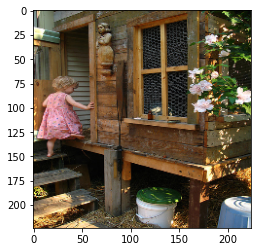

In [68]:
plt.imshow(creature_imgs[0].permute(1,2,0).int())
sentence = get_sentence_from_onehot(out,vocab)
''.join(sentence[0])

Iter 1. [Val Acc 53%] [Train Acc 54%, Loss 17.475039]
Iter 2. [Val Acc 21%] [Train Acc 24%, Loss 17.038582]
Iter 3. [Val Acc 65%] [Train Acc 65%, Loss 16.981627]
Iter 4. [Val Acc 66%] [Train Acc 67%, Loss 16.650639]
Iter 5. [Val Acc 69%] [Train Acc 68%, Loss 16.365370]
Iter 6. [Val Acc 69%] [Train Acc 69%, Loss 16.060644]
Iter 7. [Val Acc 69%] [Train Acc 69%, Loss 15.868306]
Iter 8. [Val Acc 72%] [Train Acc 71%, Loss 15.651612]
Iter 9. [Val Acc 70%] [Train Acc 71%, Loss 15.553219]
Iter 10. [Val Acc 71%] [Train Acc 72%, Loss 15.548039]
Iter 11. [Val Acc 68%] [Train Acc 68%, Loss 15.399825]
Iter 12. [Val Acc 69%] [Train Acc 69%, Loss 15.569022]
Iter 13. [Val Acc 72%] [Train Acc 72%, Loss 15.476325]
Iter 14. [Val Acc 71%] [Train Acc 71%, Loss 15.185826]
Iter 15. [Val Acc 71%] [Train Acc 71%, Loss 15.356575]
Iter 16. [Val Acc 71%] [Train Acc 72%, Loss 15.458107]
Iter 17. [Val Acc 71%] [Train Acc 71%, Loss 15.116787]
Iter 18. [Val Acc 71%] [Train Acc 72%, Loss 15.062333]
Iter 19. [Val Acc 7

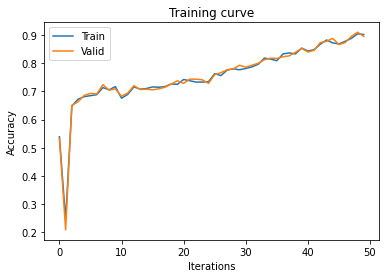

In [64]:
small_transformer = caption_transformer(8)
train(small_transformer,small_train_data,small_train_data,learning_rate=0.001,num_epoches=50)

Iter 1. [Val Acc 77%] [Train Acc 76%, Loss 13.192142]
Iter 2. [Val Acc 79%] [Train Acc 79%, Loss 14.188063]
Iter 3. [Val Acc 85%] [Train Acc 82%, Loss 13.972493]
Iter 4. [Val Acc 86%] [Train Acc 87%, Loss 13.641713]
Iter 5. [Val Acc 88%] [Train Acc 88%, Loss 13.412138]
Iter 6. [Val Acc 88%] [Train Acc 89%, Loss 13.382388]
Iter 7. [Val Acc 89%] [Train Acc 88%, Loss 13.268505]
Iter 8. [Val Acc 89%] [Train Acc 88%, Loss 13.216901]
Iter 9. [Val Acc 89%] [Train Acc 88%, Loss 13.160680]
Iter 10. [Val Acc 90%] [Train Acc 89%, Loss 13.164543]
Iter 11. [Val Acc 90%] [Train Acc 89%, Loss 13.063646]
Iter 12. [Val Acc 91%] [Train Acc 91%, Loss 13.041174]
Iter 13. [Val Acc 92%] [Train Acc 94%, Loss 12.967552]
Iter 14. [Val Acc 93%] [Train Acc 92%, Loss 13.007338]
Iter 15. [Val Acc 94%] [Train Acc 93%, Loss 12.902250]
Iter 16. [Val Acc 94%] [Train Acc 95%, Loss 12.915670]
Iter 17. [Val Acc 95%] [Train Acc 95%, Loss 12.871367]
Iter 18. [Val Acc 94%] [Train Acc 94%, Loss 12.833856]
Iter 19. [Val Acc 9

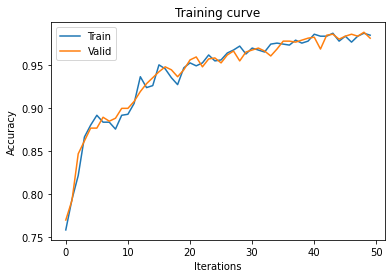

In [70]:
train(small_transformer,small_train_data,small_train_data,learning_rate=0.001,num_epoches=50)

In [110]:
get_accuracy(small_transformer,small_train_data)

tensor(0.9805)

In [40]:
big_features = vgg.features(creature_imgs[:50])
big_captions = onehot_creature_captions[:50]

In [41]:
big_dataset = My_Dataset(big_features,big_captions)

In [42]:
big_valid_features = vgg.features(creature_imgs[210:260])
big_valid_captions = onehot_creature_captions[210:260]

In [43]:
valid_dataset = My_Dataset(big_valid_features,big_valid_captions)

In [81]:
lengths =[len(s) for s in creature_captions]

In [84]:
np.mean(lengths)

54.62588060808306

In [134]:
features.shape

torch.Size([5, 512, 7, 7])

In [135]:
batch_small_data = My_Dataset(features, small_onehot)

In [332]:
batch_small_transformer = caption_transformer(8,200)

Iter 1. [Val Acc 39%] [Train Acc 40%, Loss 5.065861]
Iter 2. [Val Acc 45%] [Train Acc 45%, Loss 6.590755]
Iter 3. [Val Acc 55%] [Train Acc 55%, Loss 6.030525]
Iter 4. [Val Acc 66%] [Train Acc 66%, Loss 5.591172]
Iter 5. [Val Acc 74%] [Train Acc 72%, Loss 5.376793]
Iter 6. [Val Acc 78%] [Train Acc 78%, Loss 5.218435]
Iter 7. [Val Acc 76%] [Train Acc 77%, Loss 5.181398]
Iter 8. [Val Acc 75%] [Train Acc 75%, Loss 5.188625]
Iter 9. [Val Acc 76%] [Train Acc 76%, Loss 5.089996]
Iter 10. [Val Acc 76%] [Train Acc 78%, Loss 5.094921]
Iter 11. [Val Acc 81%] [Train Acc 80%, Loss 5.013790]
Iter 12. [Val Acc 83%] [Train Acc 80%, Loss 5.019691]
Iter 13. [Val Acc 82%] [Train Acc 82%, Loss 4.975700]
Iter 14. [Val Acc 81%] [Train Acc 83%, Loss 4.894450]
Iter 15. [Val Acc 83%] [Train Acc 83%, Loss 4.885895]
Iter 16. [Val Acc 86%] [Train Acc 85%, Loss 4.848498]
Iter 17. [Val Acc 85%] [Train Acc 86%, Loss 4.780190]
Iter 18. [Val Acc 87%] [Train Acc 85%, Loss 4.794127]
Iter 19. [Val Acc 85%] [Train Acc 86%

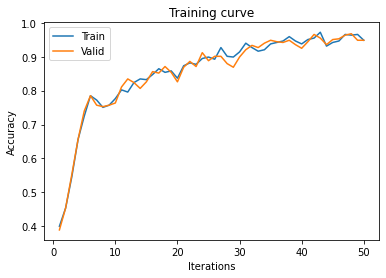

In [334]:
train(batch_small_transformer,batch_small_data,batch_small_data,50,learning_rate=0.001)

In [350]:
out = batch_small_transformer(features[0].unsqueeze(0), small_onehot[0].unsqueeze(0)[:,:-1,:])

In [357]:
index_out = torch.argmax(out,dim =2).tolist()

In [362]:
numpy_vocab = np.array(vocab)

In [364]:
''.join(numpy_vocab[index_out[0]])

'a child in a pink dress is climbing up a set of stairs in an entry wyy }@@@@@@@@@@@@@@@@@@@@'

In [367]:
out = generate_captions(features[0],batch_small_transformer)

In [368]:
''.join(out[0])

'{aym meneinenb m iog w w w w mhild g m w wog m m weilw w m m weilw w g w w w w w g m w whwow d m m w w w g m iow w m w g w g m w w w g g w w w m g g w g g m g w w w w w w w g w g g w g g m whwhw w m w '

In [330]:
out = generate_captions(features[0], batch_small_transformer)

In [331]:
''.join(out[0])

'{@nanenenenan nenenen nenenenenemenenemeneren nemenenenenenenenerenenenenenemenerenenenenenenenenenenen menenenenenenemen menenenenenenenenemenenemenenenenenenenen men menemenenenenenenenenenemenenen n'

In [227]:
get_sentence_from_onehot(small_onehot,vocab)[0]

['{',
 'a',
 ' ',
 'c',
 'h',
 'i',
 'l',
 'd',
 ' ',
 'i',
 'n',
 ' ',
 'a',
 ' ',
 'p',
 'i',
 'n',
 'k',
 ' ',
 'd',
 'r',
 'e',
 's',
 's',
 ' ',
 'i',
 's',
 ' ',
 'c',
 'l',
 'i',
 'm',
 'b',
 'i',
 'n',
 'g',
 ' ',
 'u',
 'p',
 ' ',
 'a',
 ' ',
 's',
 'e',
 't',
 ' ',
 'o',
 'f',
 ' ',
 's',
 't',
 'a',
 'i',
 'r',
 's',
 ' ',
 'i',
 'n',
 ' ',
 'a',
 'n',
 ' ',
 'e',
 'n',
 't',
 'r',
 'y',
 ' ',
 'w',
 'a',
 'y',
 ' ',
 '}',
 '@',
 '@',
 '@',
 '@',
 '@',
 '@',
 '@',
 '@',
 '@',
 '@',
 '@',
 '@',
 '@',
 '@',
 '@',
 '@',
 '@',
 '@',
 '@',
 '@']

In [167]:
small_onehot[0].shape

torch.Size([93, 51])

In [243]:
out = batch_small_transformer(features[1].unsqueeze(0), small_onehot[1].unsqueeze(0)[:,:7,:])

In [244]:
onehot_out = torch.softmax(out, axis = 1)

In [245]:
out_sentence = get_sentence_from_onehot(onehot_out,vocab)

In [246]:
part_origin_sentence = get_sentence_from_onehot(small_onehot[1].unsqueeze(0)[:,:7,:],vocab)